In [2]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np

Queremos estudiar cuales son los generos de los videojuegos que más le gustan a los usuarios de steam para asi poder realizar un analisis completo y fiable sobre el mercado de estos. Para ello vamos a usar dos datasets, el de juegos y el de porcenatjes de valoraciones, para asi poder ver tanto los generos más gustados en general y el del top 10 de los juegos mejor valorados y asi ver si tienen relación. 

In [3]:
df = pd.read_csv('percentagesReviewsGame.csv')
df.head()

,app_name,recommended,count,porcentaje
0,ULTRAKILL,True,5558,0.995344
1,Senren＊Banka,True,5004,0.994041
2,A Short Hike,True,5797,0.991449
3,The Henry Stickmin Collection,True,19211,0.990258
4,Factorio,True,107111,0.989186


In [4]:
dfg = pd.read_csv('steam_games.csv')
dfg.head()

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN


In [5]:
union1 = pd.merge(left=dfg,right=df, left_on='name', right_on='app_name')
union1.head()

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,...,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price,app_name,recommended,count,porcentaje
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...",...,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99,DOOM,True,132997,0.950162
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...",...,About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN,PLAYERUNKNOWN'S BATTLEGROUNDS,True,886417,0.539099
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...",...,About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN,BATTLETECH,True,17694,0.811168
3,https://store.steampowered.com/app/477160/Huma...,app,Human: Fall Flat,Human: Fall Flat is a quirky open-ended physic...,"Very Positive,(629),- 91% of the 629 user revi...","Very Positive,(23,763),- 91% of the 23,763 use...","Jul 22, 2016",No Brakes Games,"Curve Digital,Curve Digital","Funny,Multiplayer,Co-op,Puzzle,Physics,Local C...",...,"About This Game ***NEW ""DARK"" LEVEL AVAILABL...",NaN,"Minimum:,OS:,Windows XP/Vista/7/8/8.1/10 x86 a...","Recommended:,OS:,Windows XP/Vista/7/8/8.1/10 x...",$14.99,$17.58,Human: Fall Flat,True,116523,0.942712
4,https://store.steampowered.com/app/644930/They...,app,They Are Billions,They Are Billions is a Steampunk strategy game...,"Very Positive,(192),- 83% of the 192 user revi...","Very Positive,(12,127),- 85% of the 12,127 use...","Dec 12, 2017",Numantian Games,"Numantian Games,Numantian Games","Early Access,Base Building,Strategy,Zombies,Su...",...,About This Game They Are Billions is a strat...,NaN,"Minimum:,OS:,Windows 7, 8, 10 (32 and 64 bits)...","Recommended:,OS:,Windows 7, 8, 10 (64 bits),P...",$29.99,NaN,They Are Billions,True,27049,0.849476


Primero veremos los generos de los 10 juegos mas valorados de steam

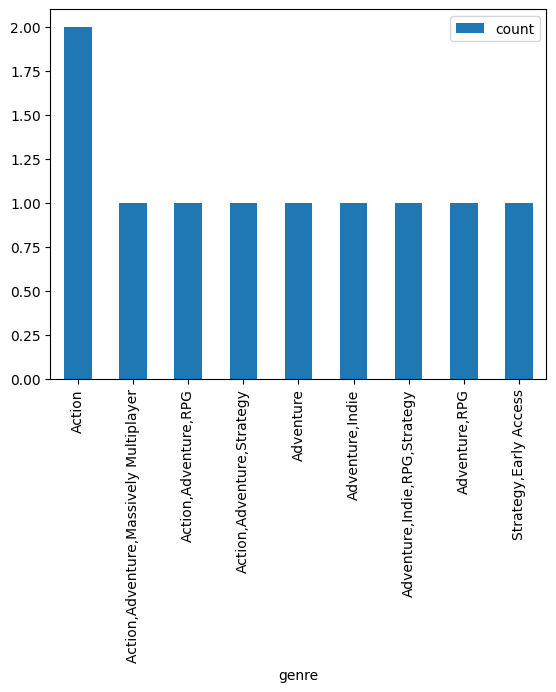

In [43]:
top10 = union1.head(10)
aux = top10.groupby('genre').count() 
mostLikedCategories = aux[['count']].sort_values(by='count', ascending = False).head(10)
mostLikedCategories.plot.bar().get_figure().savefig('mostLikedCategoriesTop10')

Se puede apreciar como los juegos de acción son los que mas gustan y como los generos de aventura, estrategia y multijugador tambien gustan mucho

Ahora veremos los generos de los 10 juegos peor valorados

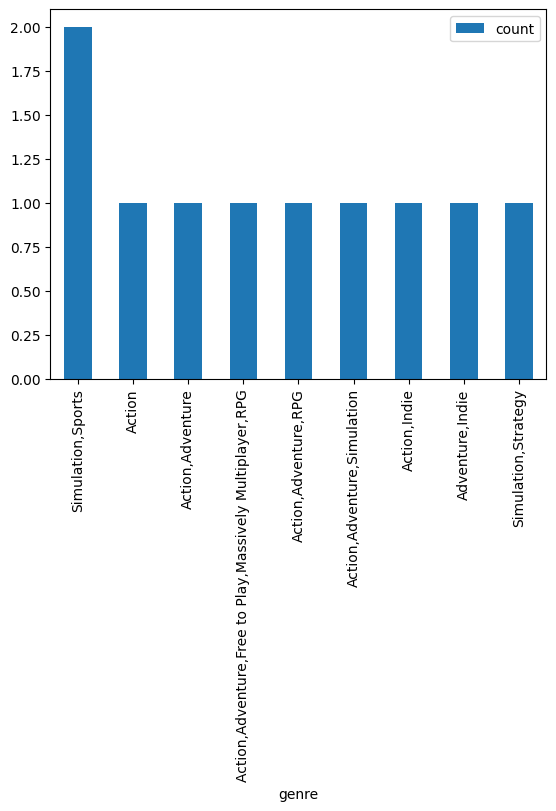

In [39]:
last10 = union1.tail(10)
aux1 = last10.groupby('genre').count() 
mostDislikedCategories = aux[['count']].sort_values(by='count', ascending = False).head(10)
mostDislikedCategories.plot.bar().get_figure().savefig('mostDislikedCategoriesTop10')

Podemos ver como los juegos de simulacion de deportes e indies son los que menos gustan

Ahora veremos si los datos obtenidos anteriormente tienen sentido y siguen el mismo camino en general con todos los juegos

Estudiaremos las 10 categorias que mas se repiten de todos los juegos

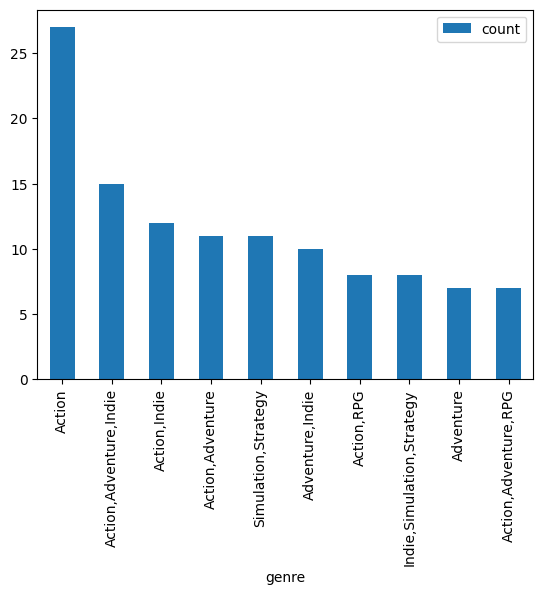

In [40]:
categories = union1.groupby('genre').count()
top10categories = categories[['count']].sort_values(by='count', ascending = False).head(10)
top10categories.plot.bar().get_figure().savefig('top10categories')

Se puede observar como los juegos de accion, aventuras y estrategia son los que mas abundan por lo que concuerda con los visto anteriormente

Ahora veremos si sucede los mismo con el top 10 de los generos que menos se repiten de todos los juegos

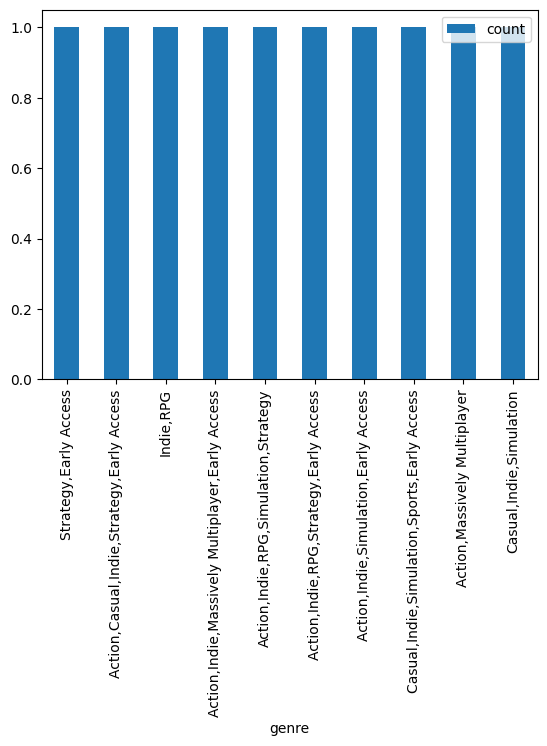

In [26]:
last10categories = categories[['count']].sort_values(by='count').head(10)
last10categories.plot.bar().get_figure().savefig('last10categories')

Se puede apreciar como los juegos indies, simulacion de deporte y de early access(acceso anticipado) son los que menos hay con lo que tambien concuerda con lo estudiado mas arriba